In [14]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR  = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR    = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '/content/drive/MyDrive/Colab Notebooks/MODELOS/'    # carpeta donde se encuentran los modelos
    ARCHIVOS_DIR = '/content/drive/MyDrive/Colab Notebooks/ARCHIVOS/'   # carpeta recuperar o copiar archivos
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
    ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

LIBRERIAS

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection,preprocessing
from ClassPerceptron import Perceptron
from matplotlib import pylab as plt

# Ejercicio 5

El archivo SEMILLAS.csv contiene información de granos que pertenecen a tres variedades diferentes de 
trigo: Kama, Rosa y Canadiense. 
- El total es de 210 ejemplos a razón de 70 ejemplos para cada tipo de grano, 
seleccionados al azar para el experimento. La información registrada corresponde al resultado de la 
visualización de alta calidad de la estructura interna del núcleo efectuada utilizando una técnica de rayos X 
blandos. Este tipo de estudio no es destructivo y es considerablemente más económico que otras técnicas 
de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se grabaron 
en placas KODAK de rayos x de 13x18 cm. Los estudios se realizaron utilizando granos de trigo cosechados 
combinados procedentes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia 
Polaca de Ciencias en Lublin. Para construir los datos, se midieron siete parámetros geométricos de cada 
grano de trigo:


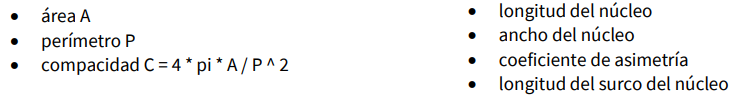

A partir de los 210 ejemplos, luego de normalizarlos utilizando los valores de media y desvío, se logró entrenar 
un perceptrón capaz de identificar, con una precisión del 100%, uno de los tres tipos de semillas. Para realizar 
el entrenamiento se utilizó una velocidad de aprendizaje de 0.05 y un máximo de 200 iteraciones. Indique 
cuál es el tipo de semilla que puede ser reconocido correctamente por un perceptrón

In [16]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'Semillas.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


In [17]:
#df = df.drop(columns=['Area', 'Perimetro'])

In [18]:
mapeo = {'Clase': {'Tipo1':0, 'Tipo2':1, 'Tipo3':2}
          }

df.replace(mapeo, inplace=True)
df

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


VARIABLE X VS Y

In [19]:
X = np.array(df.iloc[:,:-1])
Y = np.array(df['Clase']) #si el valor es drugY se deja en 1, sino 0

In [20]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state=42)

NORMALIZACION UTILIZANDO MEDIA Y DESVIO

In [21]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    # Normaliza utilizando la media y el desvio
    normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X)
   

ENTRENAMIENTO DEL PERCEPTRON

In [22]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn.fit(X_train, Y)


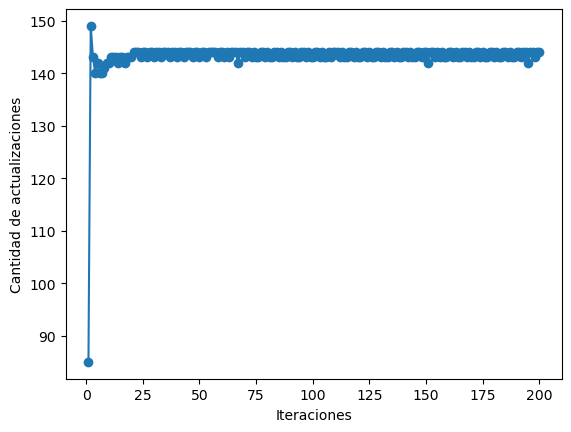

In [23]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

METRICAS GENERALES

In [24]:
Y_pred = ppn.predict(X_train)

aciertos = sum(Y_pred == Y)
print("aciertos = ", aciertos)

nAciertos = sum(Y_pred == Y)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_train.shape[0]))

aciertos =  65
% de aciertos = 30.95 %


Puede predecir correctamente solo uno de los tres tipos de semilla: CLASE 1, CLASE 2 O CLASE 3

In [25]:
from sklearn import metrics

MM = metrics.confusion_matrix(Y,Y_pred)
print("Matriz de confusión:\n%s" % MM)

Matriz de confusión:
[[29 41  0]
 [34 36  0]
 [ 1 69  0]]


La clase 1 es la que se puede clasificar correctamente ya que tiene 20 ejemplos clasificados correctamente y solo 1 incorrecto.
- La clase 2 tiene 18 ejemplos clasificados correctamente 
- La clase 3 no tiene ningun ejemplo clasficado correctramente
